In [51]:
import pickle
import pandas as pd
import numpy as np
from psm_causal_effects import psm_causal_effects

# read data
with open('data_clean.dat') as f:
    data = pickle.load(f)
f.close()

n_boot = 100

ind_set = range(len(data))

es_m2s_mean = np.array([])
es_s2m_mean = np.array([])
# es_a2s_mean = np.array([])
for k in range(n_boot):
    
    print k,
    
    inds = np.random.choice(ind_set, size=len(data), replace=True)

    es_s2m_matched = np.array([])
    es_m2s_matched = np.array([])
    es_s2m_unmatched = np.array([])
    es_m2s_unmatched = np.array([])
#     es_a2s = np.array([])
    for i in inds:

        # mood on sleep
        treatment = np.array(data[i]['mood_prev'])
        outcome = np.array(data[i]['quality'])
        confound = np.array(pd.concat([data[i]['quality_prev'],data[i]['act_prev'],data[i]['stress_prev'],data[i]['energy_prev'],data[i]['daytype']],axis=1))
        es_m2s_matched = np.append(es_m2s,psm_causal_effects(treatment=treatment, outcome=outcome, confound=confound, scorefun='replacement'))
        es_m2s_unmatched = np.append(es_m2s,psm_causal_effects(treatment=treatment, outcome=outcome, confound=confound, scorefun='unmatched'))
        
#         # activity on sleep
#         treatment = np.array(data[i]['act_prev'], dtype=float)
#         outcome = np.array(data[i]['quality'])
#         confound = np.array(pd.concat([data[i]['quality_prev'],data[i]['mood_prev'],data[i]['stress_prev'],data[i]['energy_prev'],data[i]['daytype']],axis=1))
#         es_a2s = np.append(es_a2s,psm_causal_effects(treatment=treatment, outcome=outcome, confound=confound, scorefun='replacement'))
        
        # sleep on mood
        treatment = np.array(data[i]['quality'])
        outcome = np.array(data[i]['mood'])
        confound = np.array(pd.concat([data[i]['mood_prev'],data[i]['quality_prev'],data[i]['stress_prev'],data[i]['energy_prev'],data[i]['daytype']],axis=1))
        es_s2m_matched = np.append(es_s2m,psm_causal_effects(treatment=treatment, outcome=outcome, confound=confound, scorefun='replacement'))
        es_s2m_unmatched = np.append(es_s2m,psm_causal_effects(treatment=treatment, outcome=outcome, confound=confound, scorefun='unmatched'))
        
    es_m2s_mean = np.append(es_m2s_mean, np.mean(es_m2s))
    es_s2m_mean = np.append(es_s2m_mean, np.mean(es_s2m))
#     es_a2s_mean = np.append(es_a2s_mean, np.mean(es_a2s))
    

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99


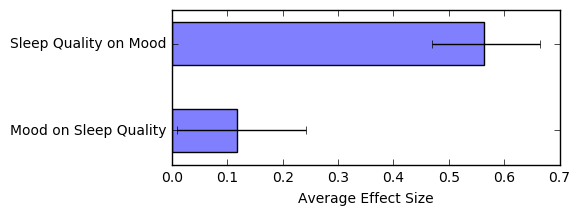

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(5,2))
plt.barh(0.75,np.mean(es_m2s_mean),xerr=np.array([np.mean(es_m2s_mean)-np.percentile(es_m2s_mean,2.5),np.percentile(es_m2s_mean,97.5)-np.mean(es_m2s_mean)]).reshape(2,1),\
       ecolor=(0,0,0),height=.5,color=(.5,.5,1))
plt.barh(1.75,np.mean(es_s2m_mean),xerr=np.array([np.mean(es_s2m_mean)-np.percentile(es_s2m_mean,2.5),np.percentile(es_s2m_mean,97.5)-np.mean(es_s2m_mean)]).reshape(2,1),\
       ecolor=(0,0,0),height=.5,color=(.5,.5,1))
# plt.xlim([0,1])
# plt.ylim([0,3])
plt.yticks([1,2],['Mood on Sleep Quality','Sleep Quality on Mood','Activity on Sleep Quality'],rotation=0);
plt.xlabel('Average Effect Size')

(array([  1.,   4.,   5.,   9.,  26.,  17.,  11.,  10.,   8.,   9.]),
 array([-0.02288372,  0.00270624,  0.02829621,  0.05388618,  0.07947615,
         0.10506612,  0.13065609,  0.15624606,  0.18183603,  0.207426  ,
         0.23301597]),
 <a list of 10 Patch objects>)

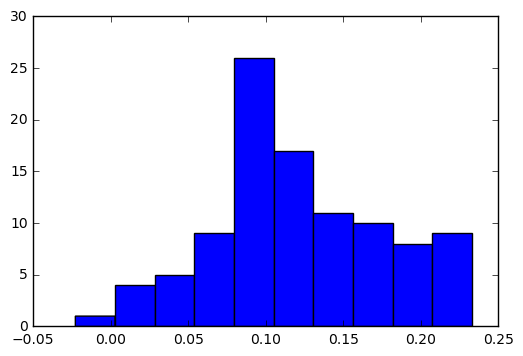

In [8]:
plt.hist(es_m2s_mean)

In [9]:
np.percentile(es_m2s_mean,.025)

-0.022118796427297648